## Lab 4
### 2.1 Phân vùng theo histogram
### 2.1.1 Phương pháp Otsu

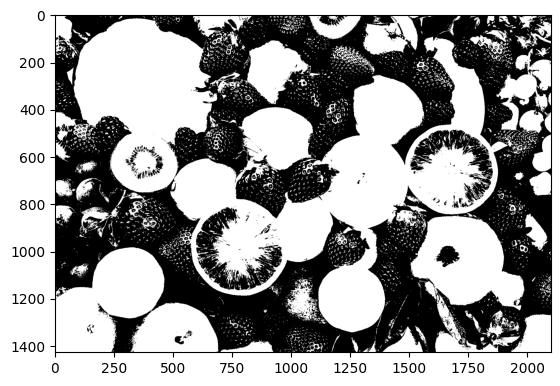

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

thres = threshold_otsu(a)
b = a > thres

b = Image.fromarray(b)
plt.imshow(b)
plt.show()

### 2.1.2 Phương pháp Adaptive Thresholding

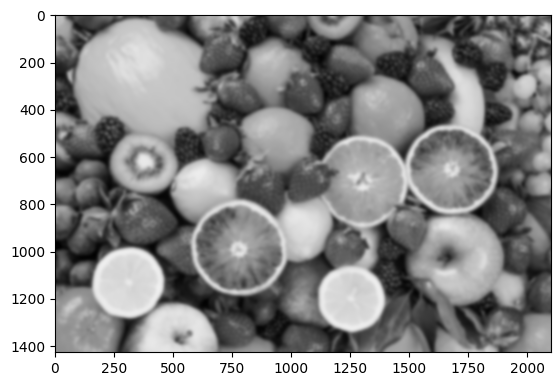

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.filters.thresholding import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)
plt.imshow(b)
plt.show()

### 2.2 Phân vùng theo region

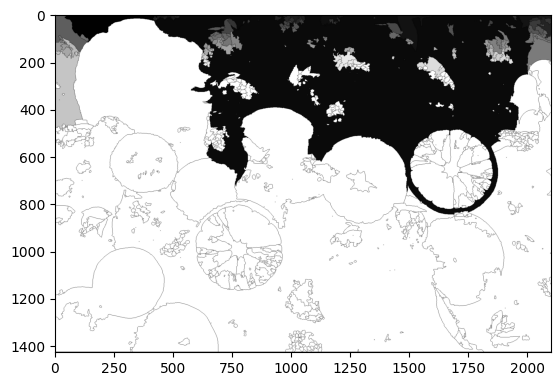

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
from skimage.filters.thresholding import threshold_local

data = cv2.imread('fruit.jpg')

a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

b2 = cv2.erode(b1, None, iterations=2)

dist_trans = cv2.distanceTransform(b2, 2, 3)

thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

labelled, ncc = label(dt)

labelled = labelled.astype(np.int32)

cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

### 2.3 Biến đổi đối tượng trong ảnh
### 2.3.1 Sử dụng binary dilation

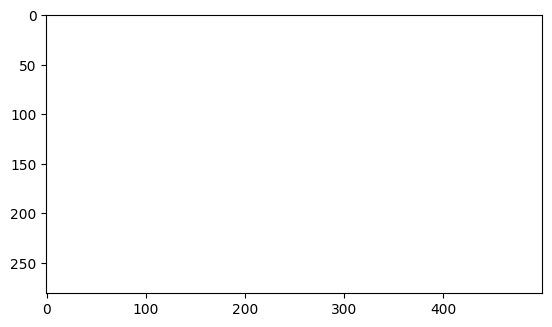

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
from skimage.filters.thresholding import threshold_local

data = Image.open('dil_img.gif').convert('L')

b= nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

### 2.3.2 Sử dụng binary opening

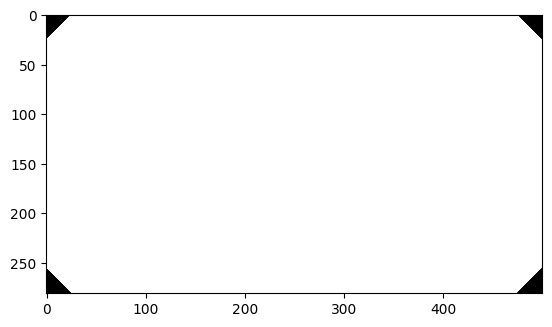

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
from skimage.filters.thresholding import threshold_local

data = Image.open('dil_img.gif').convert('L')

s = [[0,1,0],[1,1,1],[0,1,0]]
b= nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

### 2.3.3 Sử dụng binary erosion

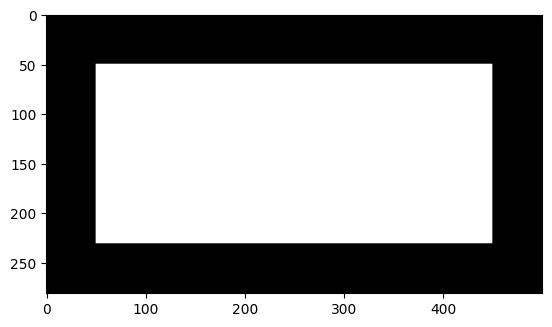

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
from skimage.filters.thresholding import threshold_local

data = Image.open('dil_img.gif').convert('L')

s = [[0,1,0],[1,1,1],[0,1,0]]
b= nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

### 2.3.4 Sử dụng binary closing

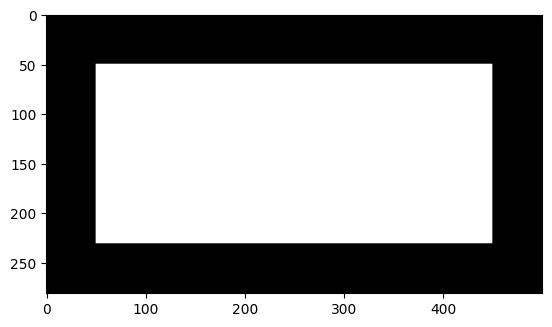

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
from skimage.filters.thresholding import threshold_local

data = Image.open('dil_img.gif').convert('L')

s = [[0,1,0],[1,1,1],[0,1,0]]
b= nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

## Bài 1

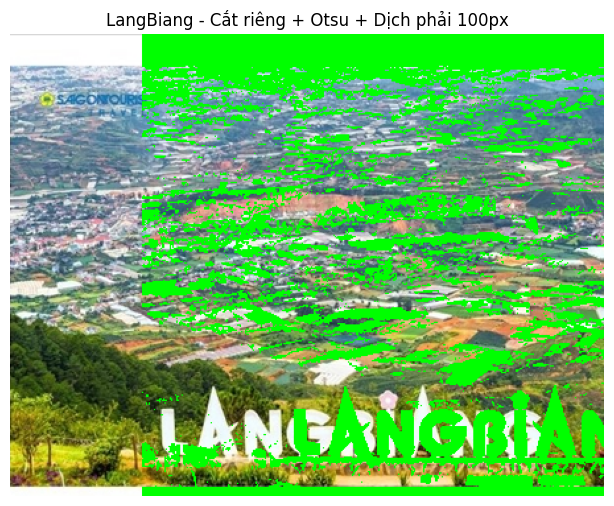

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh gốc
img = cv2.imread('dalat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Cắt chính xác vùng LangBiang (ảnh đầu tiên) ===
x, y, w, h = 20, 0, 450, 350  # ước lượng theo layout ảnh
roi = gray[y:y+h, x:x+w]

# === 2. Dùng Otsu threshold (có ngưỡng tối thiểu 0.3 * 255) ===
_, binary = cv2.threshold(roi, 0.3 * 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 3. Tịnh tiến sang phải 100px trong ảnh con ===
translated_roi = np.zeros_like(roi)
translated_roi[:, 100:] = binary[:, :-100]  # dịch sang phải 100px

# === 4. Đổ màu vùng trắng sang xanh trên ảnh gốc (cắt vùng ảnh màu)
roi_color = img[y:y+h, x:x+w].copy()
roi_color[translated_roi == 255] = [0, 255, 0]  # tô vùng dịch màu xanh lá

# === 5. Lưu ảnh kết quả ===
cv2.imwrite('lang_biang.jpg', roi_color)

# === 6. Hiển thị kết quả ===
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.title('LangBiang - Cắt riêng + Otsu + Dịch phải 100px')
plt.axis('off')
plt.show()


## Bài 2

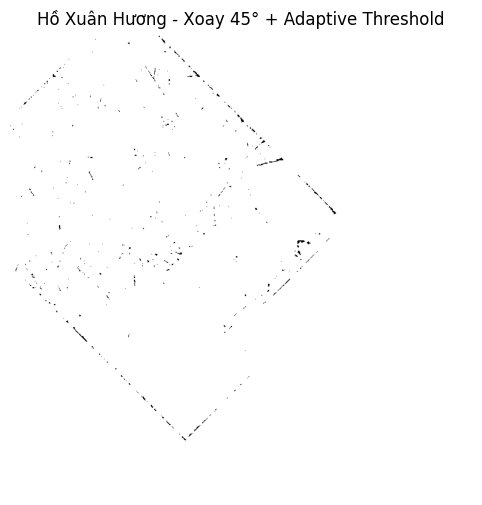

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh gốc
img = cv2.imread('dalat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Cắt vùng Hồ Xuân Hương ===
# Ước lượng từ bố cục ảnh: giữa ảnh, hàng giữa
x, y, w, h = 500, 0, 500, 650
roi = gray[y:y+h, x:x+w]

# === 2. Xoay góc 45° quanh tâm ===
(h_roi, w_roi) = roi.shape
center = (w_roi // 2, h_roi // 2)
rotate_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# Để giữ nguyên kích thước khi xoay, cần mở rộng canvas
diagonal = int(np.sqrt(w_roi**2 + h_roi**2))
extended = cv2.warpAffine(roi, rotate_matrix, (diagonal, diagonal), borderValue=255)

# === 3. Adaptive Thresholding ===
adaptive = cv2.adaptiveThreshold(
    extended,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,
    C=60
)

# === 4. Lưu và hiển thị kết quả ===
cv2.imwrite('ho_xuan_huong.jpg', adaptive)

plt.figure(figsize=(8,6))
plt.imshow(adaptive, cmap='gray')
plt.title('Hồ Xuân Hương - Xoay 45° + Adaptive Threshold')
plt.axis('off')
plt.show()

## Bài 3

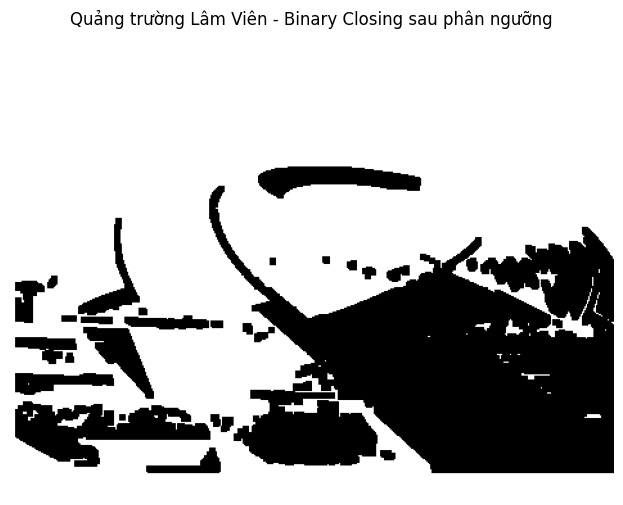

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh gốc
img = cv2.imread('dalat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Cắt vùng Quảng trường Lâm Viên (ảnh số 3) ===
x, y, w, h = 1000, 0, 470, 360
roi = gray[y:y+h, x:x+w]

# === 2. Phân ngưỡng ảnh (Otsu threshold) ===
_, binary = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 3. Áp dụng Binary Closing để loại nhiễu và lỗ nhỏ ===
kernel = np.ones((5,5), np.uint8)  # kernel tùy chỉnh
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# === 4. Lưu ảnh kết quả ===
cv2.imwrite('lam_vien.jpg', closing)

# === 5. Hiển thị kết quả ===
plt.figure(figsize=(8,6))
plt.imshow(closing, cmap='gray')
plt.title('Quảng trường Lâm Viên - Binary Closing sau phân ngưỡng')
plt.axis('off')
plt.show()
